### Setting up the development environment by importing required libraries and modules:
- *Numpy:* It will provide the support for efficient numerical computation.  
- *Pandas:* It is convenient library that supports dataframes. Working with pandas will bring ease in many crucial data operations.  
- *Matplotlib:* It provides a MATLAB-like plotting framework.  
- *Seaborn:* It is a visualization library based on matplotlib which provides a high-level interface for drawing attractive statistical graphics.  
- *Bokeh:* It is a interactive visualization library that targets modern web browsers for presentation.  
- *Statsmodel:* It provides functions and classes for statistical tests and models.  
- *Sklearn:* It is python library for data mining, data analysis and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

### Loading the <span style="color:red"> Red Wine </span> dataset

- Lets read the red wine data set from the *'UCI Machine Learning Repository'*.  
- Here, we can use the *read_csv()* from the *pandas* library to load data into dataframe from the remote url.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url)

- The *head(..)* function of *pandas* helps in viewing the preview of the dataset for n-number of rows
- The preview of data is messy and looks unformatted, as the red wine dataset seems to have data stored in *semi-colon (;)* format.  

In [3]:
wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


- Lets reload the dataset by assigning the data separator explicitly to *read_csv()*.

In [4]:
wine = pd.read_csv(url, sep=";")
wine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploring the <span style="color:red">Red Wine</span> dataset:

In [7]:
print("Shape of Red Wine dataset: {}".format(wine.shape))
print("Column headers/names: {}".format(list(wine)))


Shape of Red Wine dataset: (1599, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


- From above lines we can learn that there are total _1599 observations with 12 different feature variables/attributes_ present in the Red Wine dataset.

In [8]:
# Now, let's check the information about different variables/column from the dataset:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- We can see that, all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one _'quality'_ is an response variable.

In [9]:
# Let's look at the summary of the dataset,
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
- All the data seems to be in range (with different scales, which needs standardization).

- Let's look for the missing values in red wine dataset:

In [10]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- The red wine dataset doesn't have any missing values/rows/cells for any of the variables/feature.
- It seems that data has been collected neatly or prior cleaning has been performed before publishing the dataset.

- Let's rename the modify the dataset headers/column names by removing the _'blank spaces'_ from it.

In [11]:
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Learning more about the target/response variable/feature:
- Let's check how many unique values does the target feature _'quality'_ has?

In [12]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

- And how data is distributed among those values?

In [13]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

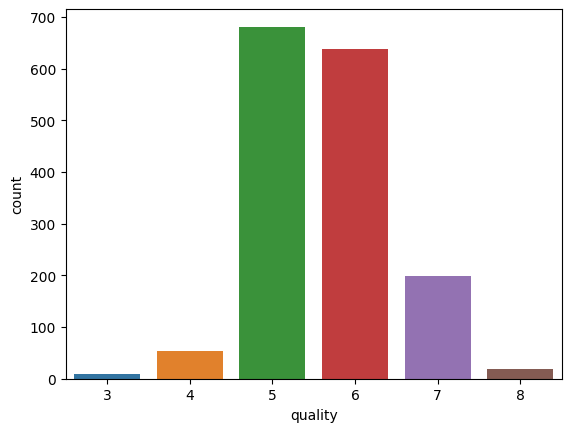

In [14]:
sns.countplot(x='quality', data=wine)

- The above distribution shows the range for response variable (_quality_) is between 3 to 8.

- Let's create a new discreet, categorical response variable/feature ('_rating_') from existing '_quality_' variable.  
_i.e._ bad: 1-4  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;average: 5-6  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;good: 7-10

In [15]:
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [16]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


#### Corelation between features/variables:
- Let's check the corelation between the target variable and predictor variables,

<Axes: >

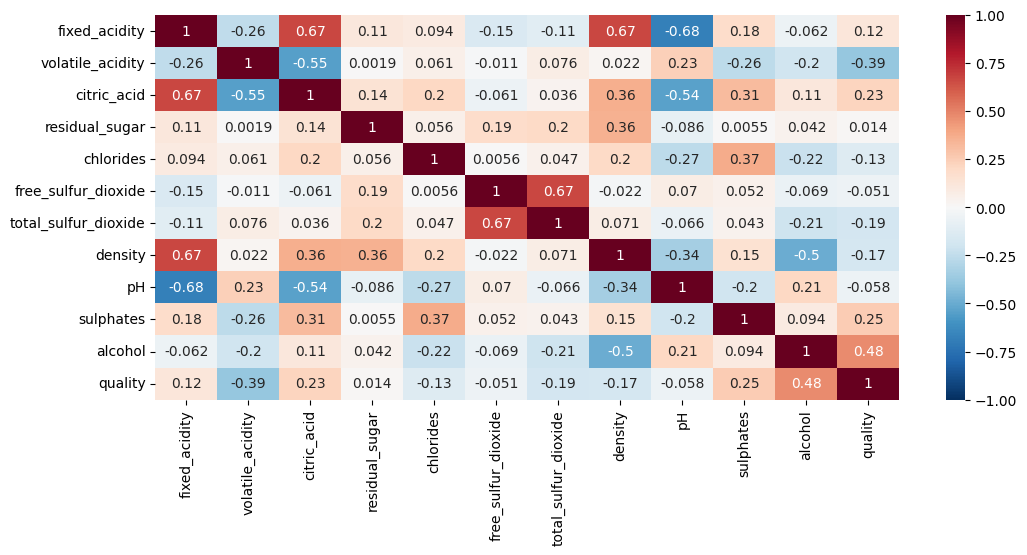

In [17]:
correlation = wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [18]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

- We can observe that, the *'alcohol, sulphates, citric_acid & fixed_acidity'* have maximum corelation with response variable '*quality*'.
- This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

#### Analysis of alcohol percentage with wine quality:

[Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

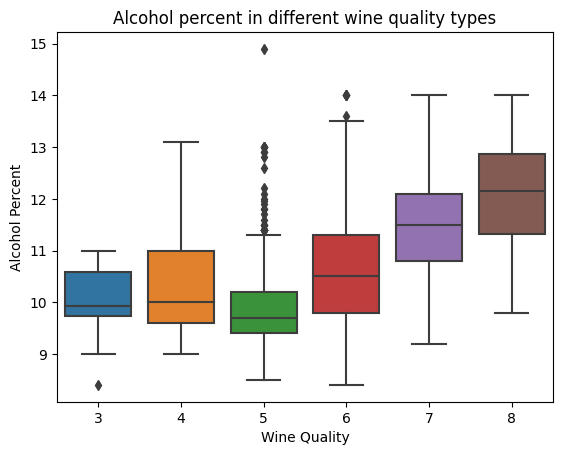

In [19]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

#### Analysis of sulphates & wine ratings:

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

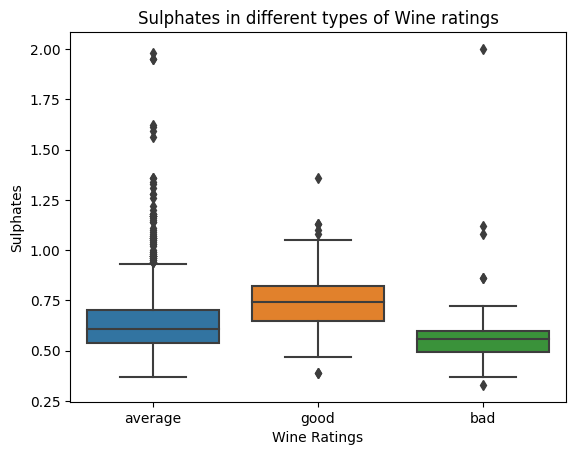

In [20]:
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

#### Analysis of Citric Acid & wine ratings:

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Xitric_acid in different types of Wine ratings')]

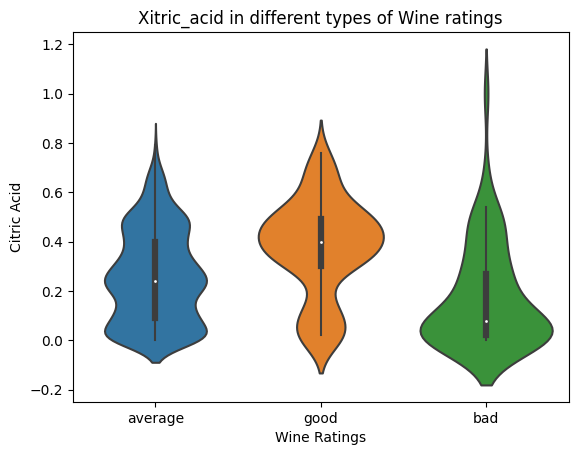

In [21]:
bx = sns.violinplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Xitric_acid in different types of Wine ratings')

#### Analysis of fixed acidity & wine ratings:

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

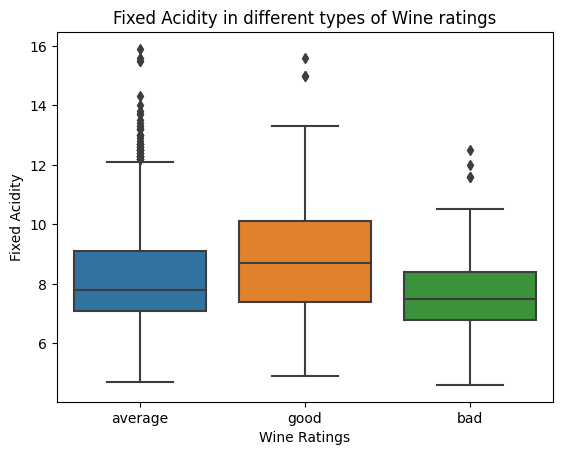

In [22]:
bx = sns.boxplot(x="rating", y='fixed_acidity', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

#### Analysis of pH & wine ratings:

[Text(0.5, 23.52222222222222, 'Wine Ratings'),
 Text(42.722222222222214, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

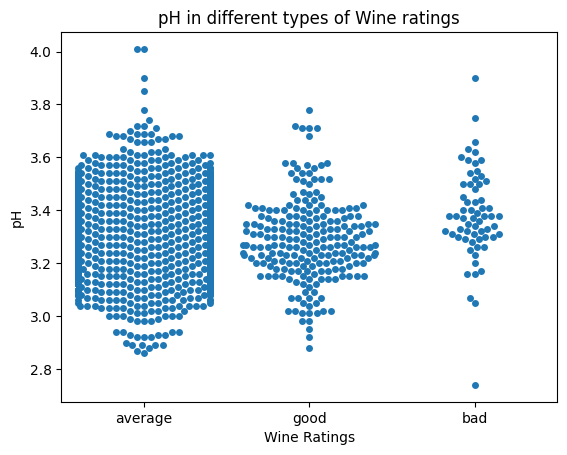

In [23]:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

### Linear Regression:
- Below graphs for different quality ratings shows a linear regression between residual_sugar & alcohol in red wine,

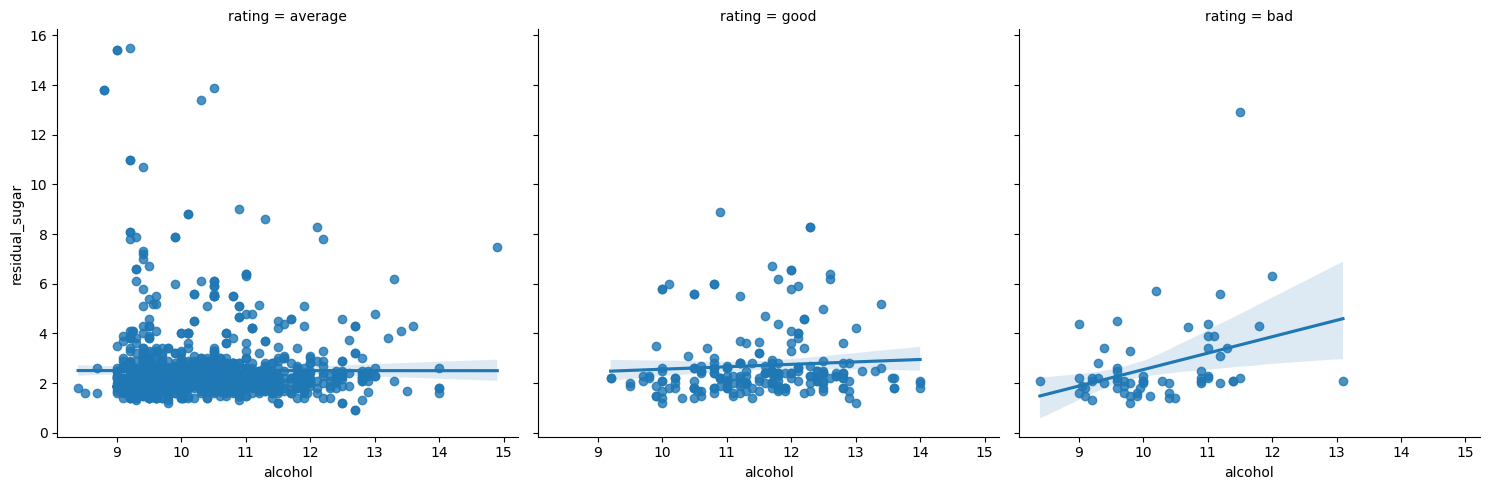

In [24]:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

- The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.  
- We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.  
- This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.

In [26]:
import statsmodels.api as sm

y, X = dmatrices('quality ~ alcohol', data=wine, return_type='dataframe')
print("X:", type(X))
print(X.columns)

model = sm.OLS(y, X)
result = model.fit()
result.summary()


X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.83e-91
Time:                        18:51:25   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
import statsmodels.formula.api as smf

model = smf.ols(formula='quality ~ alcohol', data=wine)
results = model.fit()
print(results.params)


Intercept    1.874975
alcohol      0.360842
dtype: float64


- The above wine quality vs alcohol content regression model's result shows that, the minimum value for quality is 1.87 and there will be increment by single unit for wine quality for every change of 0.360842 alcohol units.

### Classification
#### Classification using Statsmodel:
- We will use statsmodel for this logistic regression analysis of predicting good wine quality (>4).
- Let's create a new categorical variable/column (rate_code) with two possible values (good = 1 & bad = 0).

In [32]:
import statsmodels.api as sm

wine['rate_code'] = (wine['quality'] > 4).astype(np.float32)
y, X = dmatrices('rate_code ~ alcohol', data=wine)

<Axes: ylabel='Density'>

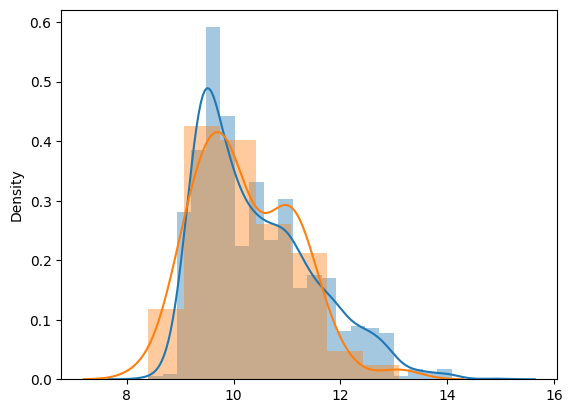

In [33]:

sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

- The above plot shows the higher probability for red wine quality will be good if alcohol percentage is more than equal to 12, whereas the same probability reduces as alcohol percentage decreases.

In [35]:
import statsmodels.api as sm

model = sm.Logit(y, X)
result = model.fit()
result.summary2()


Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: rate_code        Pseudo R-squared: 0.005   
Date:               2023-12-25 18:53 AIC:              532.3386
No. Observations:   1599             BIC:              543.0928
Df Model:           1                Log-Likelihood:   -264.17 
Df Residuals:       1597             LL-Null:          -265.48 
Converged:          1.0000           LLR p-value:      0.10487 
No. Iterations:     8.0000           Scale:            1.0000  
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

<Axes: ylabel='Density'>

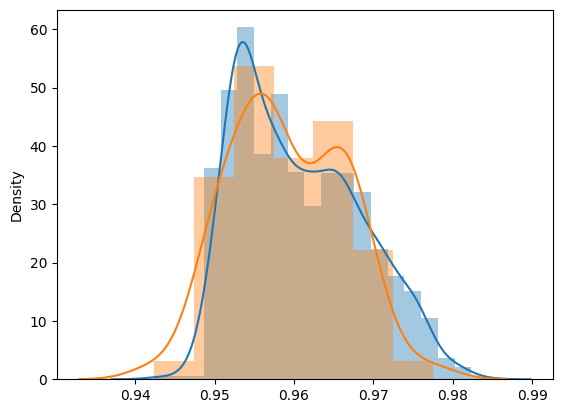

In [36]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

In [37]:
yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

    accuracy                           0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



- The above distribution plot displays the overlapped outcomes for the good and bad quality plots of the red wine.
- We can observe that the precision for the good wine prediction is almost 96% accurate, where as for bad wine its only 4%, which is not good. But overall there is 92% average precision in wine quality rate prediction.

#### Classification using Sklearn's LogisticRegression:

In [38]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + citric_acid + fixed_acidity', data = wine)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



- The accuracy matrix for sklearn's linear regression model for red wine quality prediction shows the overall 92% precision which is similar to previous statsmodel's average precision.
- Also the precision for good wine (1) prediction is almost 96%.
- But the precision is almost 0% for the bad type of wine (0) with sklearn's linear regression model. Which is not a good sign for the analysis.

#### Classification using Sklearn's RandomForestClassifier:

In [39]:
y, X = dmatrices('rate_code ~ alcohol', data = wine)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.52      0.52      1599
weighted avg       0.96      0.96      0.94      1599



Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X, y.ravel())

# Make predictions
dt_predictions = dt_model.predict(X)

# Evaluate the model
print(sklearn.metrics.classification_report(y, dt_predictions))


              precision    recall  f1-score   support

         0.0       0.67      0.06      0.12        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.81      0.53      0.55      1599
weighted avg       0.95      0.96      0.95      1599



Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC

# Define the model
svm_model = SVC()

# Fit the model
svm_model.fit(X, y.ravel())

# Make predictions
svm_predictions = svm_model.predict(X)

# Evaluate the model
print(sklearn.metrics.classification_report(y, svm_predictions))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



 K-Nearest Neighbors (KNN)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X, y.ravel())

# Make predictions
knn_predictions = knn_model.predict(X)

# Evaluate the model
print(sklearn.metrics.classification_report(y, knn_predictions))


              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.51      0.51      1599
weighted avg       0.96      0.96      0.94      1599



Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model = GradientBoostingClassifier()

# Fit the model
gb_model.fit(X, y.ravel())

# Make predictions
gb_predictions = gb_model.predict(X)

# Evaluate the model
print(sklearn.metrics.classification_report(y, gb_predictions))


              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.51      0.51      1599
weighted avg       0.96      0.96      0.94      1599



Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X, y.ravel())

nb_predictions = nb_model.predict(X)

# Evaluate the model
print(sklearn.metrics.classification_report(y, nb_predictions))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



Putting Everything Together

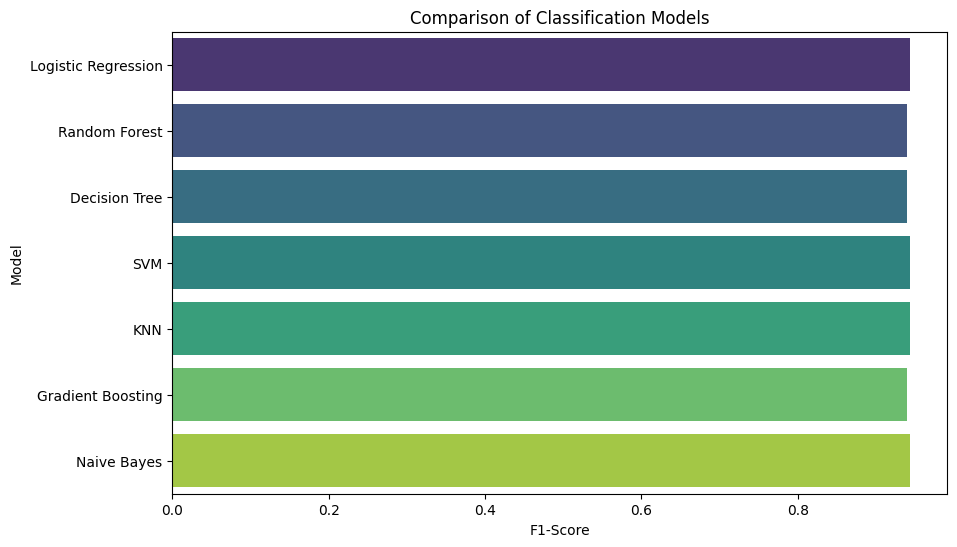

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
metrics = {"Model": [], "Precision": [], "Recall": [], "F1-Score": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    metrics["Model"].append(name)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="F1-Score", y="Model", data=metrics_df, palette="viridis")
plt.title('Comparison of Classification Models')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.show()


The bar plot suggests Logistic Regression outperforms other models for this dataset, with Random Forest as a close second, indicating strong classification capabilities. Decision Tree, SVM, and KNN show moderate effectiveness, possibly needing parameter adjustments. Surprisingly, Gradient Boosting underperforms, which may require model tuning, while Naive Bayes ranks lowest, likely due to its strong independence assumptions. A thorough model validation, including cross-validation and additional metrics, would be beneficial to confirm these initial findings.

### Conclusion
After analyzing the dataset, we identified key determinants influencing red wine quality. Recognizing that quality is subjective, we introduced a categorical variable 'rating' to supplement the 'quality' factor. We then applied multiple models to predict wine quality, including Logistic Regression, Random Forest, and other classifiers like Decision Tree, SVM, KNN, Gradient Boosting, and Naive Bayes. Logistic Regression emerged as the most effective model, closely followed by Random Forest, indicating their robustness in classification tasks for this dataset. These insights can guide winemakers in tweaking production variables to enhance wine quality and market value. Ultimately, with a predictive model in place, controlling these variables could lead to higher quality wine and increased profitability.